In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
from sklearn.decomposition import KernelPCA
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

plt.rcParams['figure.figsize']=[12,8]

In [2]:
df=pd.read_csv('/content/drive/MyDrive/iisc/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00


In [3]:
df.isnull().sum()
(df.isnull().sum()/len(df))*100

area_type        0.225276
availability     0.225276
location         0.232785
size             0.345423
society         41.375685
total_sqft       0.225276
bath             0.773447
balcony          4.790869
price            0.225276
dtype: float64

In [4]:
#40% of the data is missing so droping the column
df.drop('society',axis=1,inplace=True)

In [5]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


preprocess data


In [6]:
df.location.replace(to_replace=np.NaN,value=df.location.mode()[0],inplace=True)
df.area_type.replace(to_replace=np.NaN,value=df.area_type.mode()[0],inplace=True)

In [7]:
df['size']=df['size'].str.split(' ',expand=True)[0].astype(np.number)
df.bath=df.bath.astype(np.number)

In [8]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00


In [9]:
flag=(df.availability=="Ready To Move")
df.availability=flag.replace({True:1,False:0})
df.availability=df.availability.astype(object)
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,1,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2.0,1200.0,2.0,1.0,51.00


In [10]:
df.isnull().sum()

area_type         0
availability      0
location          0
size             46
total_sqft       30
bath            103
balcony         638
price            30
dtype: int64

categorical data

In [11]:
df_cat=df.select_dtypes(object)
df_cat.head(1)

,area_type,availability,location
0,Super built-up Area,0,Electronic City Phase II


numeric data

In [12]:
df_num=df.select_dtypes(np.number)
df_num.head()

,size,total_sqft,bath,balcony,price
0,2.0,1056.0,2.0,1.0,39.07
1,4.0,2600.0,5.0,3.0,120.00
2,3.0,1440.0,2.0,3.0,62.00
3,3.0,1521.0,3.0,1.0,95.00
4,2.0,1200.0,2.0,1.0,51.00


impute

In [13]:
imputer = KNNImputer()

# fit on the dataset
imputer.fit(df_num)

# transform the dataset
df_num_impute = pd.DataFrame(imputer.transform(df_num),columns=df_num.columns)

In [14]:
df_num_impute

,size,total_sqft,bath,balcony,price
0,2.0,1056.0,2.0,1.0,39.07
1,4.0,2600.0,5.0,3.0,120.00
2,3.0,1440.0,2.0,3.0,62.00
3,3.0,1521.0,3.0,1.0,95.00
4,2.0,1200.0,2.0,1.0,51.00
...,...,...,...,...,...
13312,5.0,3453.0,4.0,0.0,231.00
13313,4.0,3600.0,5.0,1.6,400.00
13314,2.0,1141.0,2.0,1.0,60.00
13315,4.0,4689.0,4.0,1.0,488.00


In [15]:
df=pd.concat([df_cat,df_num_impute],axis=1)
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,1,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2.0,1200.0,2.0,1.0,51.00


In [16]:
(df.isnull().sum()/len(df))*100

area_type       0.0
availability    0.0
location        0.0
size            0.0
total_sqft      0.0
bath            0.0
balcony         0.0
price           0.0
dtype: float64

<Axes: >

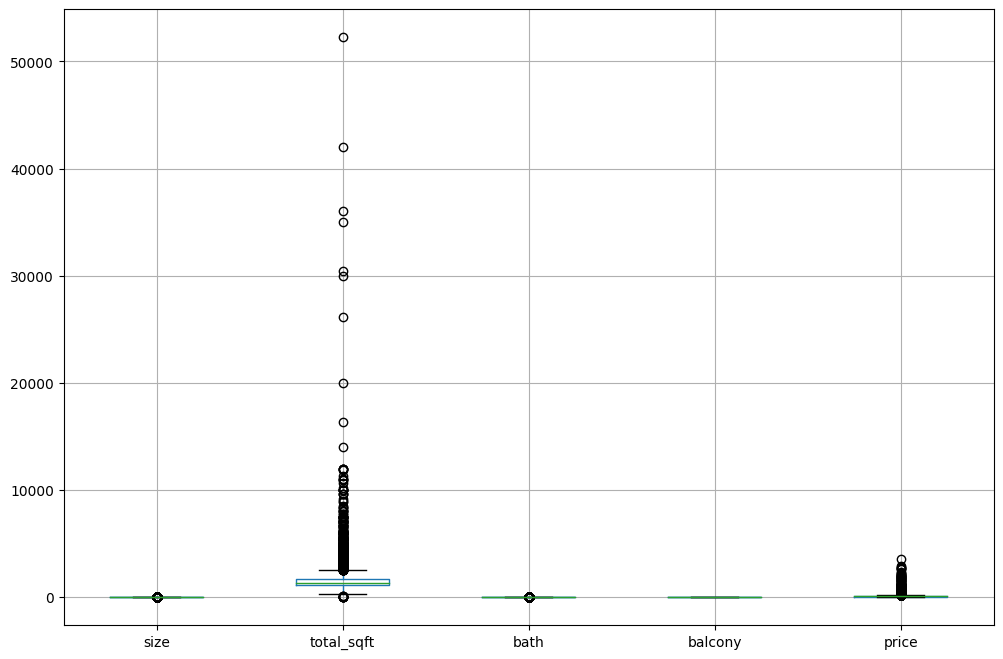

In [17]:
df.boxplot()

In [18]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1
IQR

df = df[~((df) > (q3 + (1.5 * IQR))).any(axis=1)]

df.head()

<ipython-input-18-08fa228055ac>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.quantile(0.25)
<ipython-input-18-08fa228055ac>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.quantile(0.75)
<ipython-input-18-08fa228055ac>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df) > (q3 + (1.5 * IQR))).any(axis=1)]


,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
2,Built-up Area,1,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2.0,1200.0,2.0,1.0,51.00
5,Super built-up Area,1,Whitefield,2.0,1170.0,2.0,1.0,38.00


<Axes: >

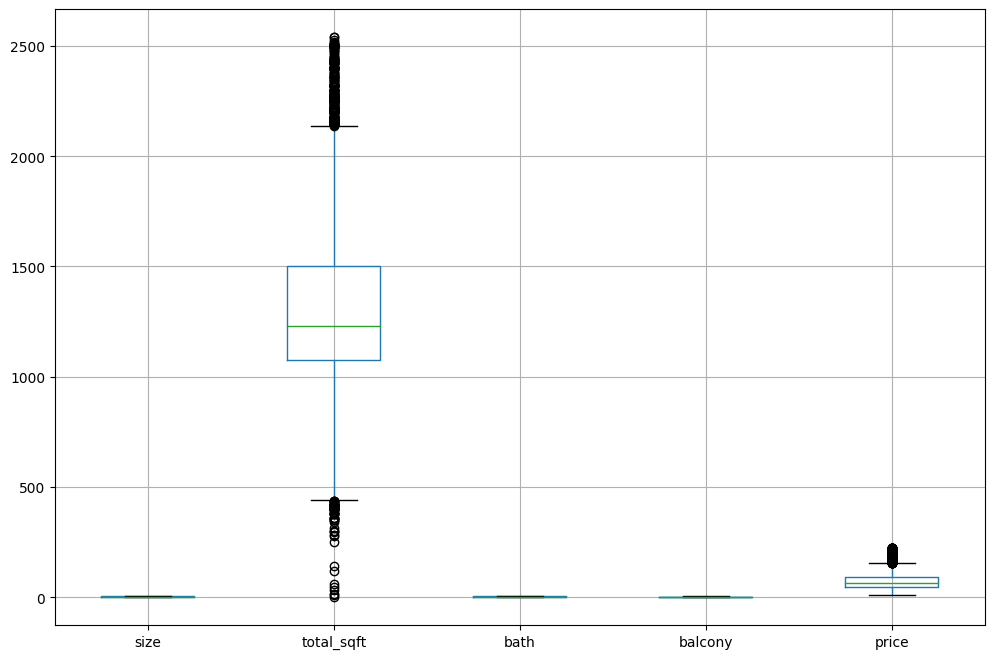

In [19]:
df.boxplot()

In [20]:
df.shape

(11120, 8)

standardize

In [21]:
df.select_dtypes(np.number)

,size,total_sqft,bath,balcony,price
0,2.0,1056.0,2.0,1.0,39.07
2,3.0,1440.0,2.0,3.0,62.00
3,3.0,1521.0,3.0,1.0,95.00
4,2.0,1200.0,2.0,1.0,51.00
5,2.0,1170.0,2.0,1.0,38.00
...,...,...,...,...,...
13309,2.0,1262.0,2.0,2.0,47.00
13310,3.0,1345.0,2.0,1.0,57.00
13311,3.0,1715.0,3.0,3.0,112.00
13314,2.0,1141.0,2.0,1.0,60.00


In [22]:
data_cat=df.select_dtypes(exclude=np.number)
data_num=df.select_dtypes(np.number)
data_cat=data_cat.reset_index()

In [23]:
ss=StandardScaler()
data_num_scaled=pd.DataFrame(ss.fit_transform(data_num),columns=data_num.columns)
data_num_scaled=data_num_scaled.reset_index()
data_num_scaled.head()

,index,size,total_sqft,bath,balcony,price
0,0,-0.649410,-0.624846,-0.440965,-0.715699,-0.903515
1,1,0.837003,0.386558,-0.440965,1.862747,-0.306717
2,2,0.837003,0.599901,1.063850,-0.715699,0.552174
3,3,-0.649410,-0.245570,-0.440965,-0.715699,-0.593013
4,4,-0.649410,-0.324586,-0.440965,-0.715699,-0.931364


In [64]:
data_scaled=pd.concat([data_num_scaled,data_cat],axis=1).drop('index',axis=1)
data_scaled.head()

,size,total_sqft,bath,balcony,price,area_type,availability,location
0,-0.649410,-0.624846,-0.440965,-0.715699,-0.903515,Super built-up Area,0,Electronic City Phase II
1,0.837003,0.386558,-0.440965,1.862747,-0.306717,Built-up Area,1,Uttarahalli
2,0.837003,0.599901,1.063850,-0.715699,0.552174,Super built-up Area,1,Lingadheeranahalli
3,-0.649410,-0.245570,-0.440965,-0.715699,-0.593013,Super built-up Area,1,Kothanur
4,-0.649410,-0.324586,-0.440965,-0.715699,-0.931364,Super built-up Area,1,Whitefield


In [65]:
data=pd.concat([data_num_scaled,df_cat],axis=1).drop('index',axis=1)
data_scaled.head()

,size,total_sqft,bath,balcony,price,area_type,availability,location
0,-0.649410,-0.624846,-0.440965,-0.715699,-0.903515,Super built-up Area,0,Electronic City Phase II
1,0.837003,0.386558,-0.440965,1.862747,-0.306717,Built-up Area,1,Uttarahalli
2,0.837003,0.599901,1.063850,-0.715699,0.552174,Super built-up Area,1,Lingadheeranahalli
3,-0.649410,-0.245570,-0.440965,-0.715699,-0.593013,Super built-up Area,1,Kothanur
4,-0.649410,-0.324586,-0.440965,-0.715699,-0.931364,Super built-up Area,1,Whitefield


encoding

In [66]:
data_encoded_scaled=pd.get_dummies(data_scaled,columns=['area_type','location'])
data_encoded_scaled.head()

,size,total_sqft,bath,balcony,price,availability,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,...,location_mvj engineering college,location_pavitra paradise,location_poornaprajna layout,"location_ravindra nagar, T.dasarahalli peenya",location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_singapura paradise,location_tc.palya,location_whitefiled
0,-0.649410,-0.624846,-0.440965,-0.715699,-0.903515,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.837003,0.386558,-0.440965,1.862747,-0.306717,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.837003,0.599901,1.063850,-0.715699,0.552174,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.649410,-0.245570,-0.440965,-0.715699,-0.593013,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-0.649410,-0.324586,-0.440965,-0.715699,-0.931364,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**Spectral clustering**

In [27]:
pca_data=data_encoded_scaled

In [28]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_data=pca.fit_transform(pca_data)



In [29]:
pca_df=pd.DataFrame(pca_data,columns=['PC1','PC2'])

In [30]:
print(pca_df)

            PC1       PC2
0     -1.448361  0.278131
1      0.703874 -1.652794
2      1.312534  0.947353
3     -1.104691  0.310545
4     -1.293714  0.217741
...         ...       ...
11115 -0.749526 -0.915231
11116 -0.118034  0.506623
11117  2.405320 -1.320564
11118 -1.081160  0.568226
11119 -3.830600 -0.243920

[11120 rows x 2 columns]


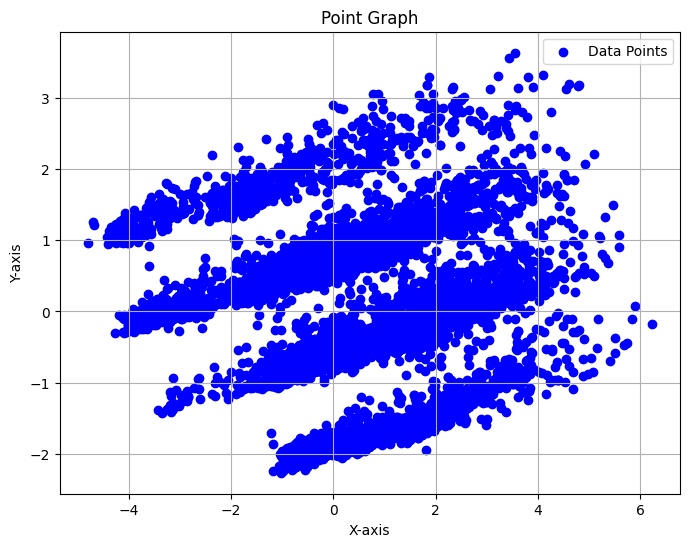

In [31]:

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', marker='o', label='Data Points')
plt.title('Point Graph')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()






In [32]:
k=2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA
from numpy import save
from numpy import load

In [33]:
def distance(p1,p2):
  return LA.norm(p1-p2)

In [34]:
data_size=len(pca_df)
print(data_size)

11120


In [35]:
from scipy.spatial import distance
rbf=7.6
K=np.exp(-rbf*distance.cdist(pca_df,pca_df,metric='sqeuclidean'))

In [36]:
D=K.sum(axis=1)
D=np.sqrt(1/D)
L=np.multiply(D[np.newaxis,:],np.multiply(K,D[:,np.newaxis]))

In [37]:
L.sum(axis=1)[2]

1.0559858588134898

In [38]:
from scipy import linalg
from sklearn.preprocessing import normalize

In [39]:
#eignval,eignvector = np.linalg.eig(L)

In [40]:
#save('/content/drive/MyDrive/iisc/eignval.npy', eignval)

In [41]:
#save('/content/drive/MyDrive/iisc/eignvector.npy', eignvector)

In [42]:
eignvector=load('/content/drive/MyDrive/iisc/eignvector.npy')
eignval=load('/content/drive/MyDrive/iisc/eignval.npy')

In [48]:
eignval=np.real(eignval)
eignvector=np.real(eignvector)

In [49]:
sorted_indices = np.argsort(eignval)

# Sort the eigenvalues and eigenvectors based on the sorted indices
sorted_eignval = eignval[sorted_indices]
sorted_eignvector = eignvector[:, sorted_indices]

In [50]:
k=4
Q=sorted_eignvector[:,0:k]

In [51]:
print(eignval.shape,Q.shape)

(11120,) (11120, 4)


In [53]:
model=KMeans(n_clusters=4,random_state=10)
cluster_kmeans=model.fit_predict(Q)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
data_encoded_scaled

,size,total_sqft,bath,balcony,price,availability,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,...,location_mvj engineering college,location_pavitra paradise,location_poornaprajna layout,"location_ravindra nagar, T.dasarahalli peenya",location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_singapura paradise,location_tc.palya,location_whitefiled
0,-0.649410,-0.624846,-0.440965,-0.715699,-0.903515,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.837003,0.386558,-0.440965,1.862747,-0.306717,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.837003,0.599901,1.063850,-0.715699,0.552174,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.649410,-0.245570,-0.440965,-0.715699,-0.593013,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-0.649410,-0.324586,-0.440965,-0.715699,-0.931364,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11115,-0.649410,-0.082270,-0.440965,0.573524,-0.697121,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11116,0.837003,0.136341,-0.440965,-0.715699,-0.436851,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11117,0.837003,1.110871,1.063850,1.862747,0.994632,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11118,-0.649410,-0.400968,-0.440965,-0.715699,-0.358771,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
label_data=data_encoded_scaled
label_data['label']=cluster_kmeans

In [ ]:
label_data

In [83]:
from sklearn.neighbors import NearestNeighbors
knn= NearestNeighbors(n_neighbors=10)
knn.fit(data_encoded_scaled,label_data['label'])

NearestNeighbors(n_neighbors=10)

User Input

In [84]:
input=data_encoded_scaled.iloc[[1]]

input.shape

(1, 1118)

In [ ]:
df.iloc[0]

In [89]:
pred=knn.kneighbors(input, return_distance=False)
print(pd.DataFrame(df.iloc[pred[0]]))

                  area_type availability          location  size  total_sqft  \
2            Built-up  Area            1       Uttarahalli   3.0      1440.0   
637          Built-up  Area            1       Singasandra   3.0      1440.0   
11776        Built-up  Area            1    Devasthanagalu   3.0      1470.0   
9467   Super built-up  Area            1       Uttarahalli   3.0      1475.0   
5756   Super built-up  Area            1       Uttarahalli   3.0      1390.0   
6670         Built-up  Area            1  Dena Bank Colony   3.0      1391.0   
4583   Super built-up  Area            1       Uttarahalli   3.0      1360.0   
5539         Built-up  Area            1    Nayandanahalli   3.0      1350.0   
3352         Built-up  Area            1    B Narayanapura   3.0      1460.0   
4322         Built-up  Area            1     Akshaya Nagar   3.0      1419.0   

       bath  balcony  price  
2       2.0      3.0  62.00  
637     2.0      3.0  65.00  
11776   2.0      3.0  60.00  